In [37]:
import pandas as pd
import nltk
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import string

In [2]:
d1 = pd.read_csv("C:/Users/HP/Downloads/Elon_musk.csv",encoding='ISO-8859-1')
d1

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
with open("C:/Users/HP/Downloads/positive-words.txt","r")as file:
    positive_words = file.read()

In [5]:
positive_words_list = [line.strip() for line in positive_words.split('\n') if not line.startswith(';') and line.strip()]
positive_words_list

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [10]:
with open("C:/Users/HP/Downloads/stop.txt", "r") as file:
    stopwords = file.read().splitlines()

In [11]:
stopwords

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [ ]:
translator = str.maketrans("", "", string.punctuation)
d1['Text'] = d1['Text'].apply(lambda text: text.translate(translator))

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [14]:
translator = str.maketrans("", "", string.punctuation)
d1['Text'] = d1['Text'].apply(lambda text: text.translate(translator))

In [15]:
d1['Sentiment_Score'] = d1['Text'].apply(lambda text: sia.polarity_scores(text)['compound'])
d1['Sentiment_Score']

0       0.0000
1       0.0000
2       0.6249
3      -0.2732
4       0.8271
         ...  
1994   -0.4215
1995    0.5994
1996    0.0000
1997   -0.7003
1998    0.4215
Name: Sentiment_Score, Length: 1999, dtype: float64

In [16]:
d1

,Unnamed: 0,Text,Sentiment_Score
0,1,kunalb11 Im an alien,0.0000
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...,0.0000
2,3,joerogan Spotify Great interview,0.6249
3,4,gtera27 Doge is underestimated,-0.2732
4,5,teslacn Congratulations Tesla China for amazin...,0.8271
...,...,...,...
1994,1995,flcnhvy True it sounds so surreal but the nega...,-0.4215
1995,1996,PPathole Make sure to read ur terms amp condit...,0.5994
1996,1997,TeslaGong PPathole Samwise Gamgee,0.0000
1997,1998,PPathole Altho Dumb and Dumber is U0001F525U00...,-0.7003


In [17]:
d1['Sentiment_Label'] = d1['Sentiment_Score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')
d1

,Unnamed: 0,Text,Sentiment_Score,Sentiment_Label
0,1,kunalb11 Im an alien,0.0000,neutral
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...,0.0000,neutral
2,3,joerogan Spotify Great interview,0.6249,positive
3,4,gtera27 Doge is underestimated,-0.2732,negative
4,5,teslacn Congratulations Tesla China for amazin...,0.8271,positive
...,...,...,...,...
1994,1995,flcnhvy True it sounds so surreal but the nega...,-0.4215,negative
1995,1996,PPathole Make sure to read ur terms amp condit...,0.5994,positive
1996,1997,TeslaGong PPathole Samwise Gamgee,0.0000,neutral
1997,1998,PPathole Altho Dumb and Dumber is U0001F525U00...,-0.7003,negative


In [18]:
x = d1['Text']
x

0                                   kunalb11 Im an alien
1       IDAACarmack Ray tracing on Cyberpunk with HDR ...
2                        joerogan Spotify Great interview
3                          gtera27 Doge is underestimated
4       teslacn Congratulations Tesla China for amazin...
                              ...                        
1994    flcnhvy True it sounds so surreal but the nega...
1995    PPathole Make sure to read ur terms amp condit...
1996                    TeslaGong PPathole Samwise Gamgee
1997    PPathole Altho Dumb and Dumber is U0001F525U00...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [19]:
y = d1['Sentiment_Label']
y

0        neutral
1        neutral
2       positive
3       negative
4       positive
          ...   
1994    negative
1995    positive
1996     neutral
1997    negative
1998    positive
Name: Sentiment_Label, Length: 1999, dtype: object

In [20]:
vectorizer = CountVectorizer(stop_words=stopwords)

In [21]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
for i in d1['Text'].index:
    d1['Text'].iloc[i] = stemmer.stem(d1['Text'].iloc[i])
d1['Text']

C:\Users\HP\AppData\Local\Temp\ipykernel_3524\537993069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Text'].iloc[i] = stemmer.stem(d1['Text'].iloc[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_3524\537993069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Text'].iloc[i] = stemmer.stem(d1['Text'].iloc[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_3524\537993069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Tex

0                                   kunalb11 im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                              gtera27 doge is underestim
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                     teslagong ppathole samwise gamge
1997    ppathole altho dumb and dumber is u0001f525u00...
1998                            progress update august 28
Name: Text, Length: 1999, dtype: object

In [22]:
d1

,Unnamed: 0,Text,Sentiment_Score,Sentiment_Label
0,1,kunalb11 im an alien,0.0000,neutral
1,2,idaacarmack ray tracing on cyberpunk with hdr ...,0.0000,neutral
2,3,joerogan spotify great interview,0.6249,positive
3,4,gtera27 doge is underestim,-0.2732,negative
4,5,teslacn congratulations tesla china for amazin...,0.8271,positive
...,...,...,...,...
1994,1995,flcnhvy true it sounds so surreal but the nega...,-0.4215,negative
1995,1996,ppathole make sure to read ur terms amp condit...,0.5994,positive
1996,1997,teslagong ppathole samwise gamge,0.0000,neutral
1997,1998,ppathole altho dumb and dumber is u0001f525u00...,-0.7003,negative


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()
Vt = Vectorizer.fit_transform(d1['Text'])
Vt.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer().fit(Vt)
x_vect = transformer.transform(Vt)
x_vect

<1999x5604 sparse matrix of type '<class 'numpy.float64'>'
	with 19756 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [26]:
training_accuracy = []
test_accuracy = []

In [ ]:
for i in range(1,1001):
    X_train,X_test,Y_train,Y_test = train_test_split(x_vect,y,test_size=0.30,random_state=i)
    logreg.fit(X_train,Y_train)
    Y_pred_train = logreg.predict(X_train)
    Y_pred_test  = logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))


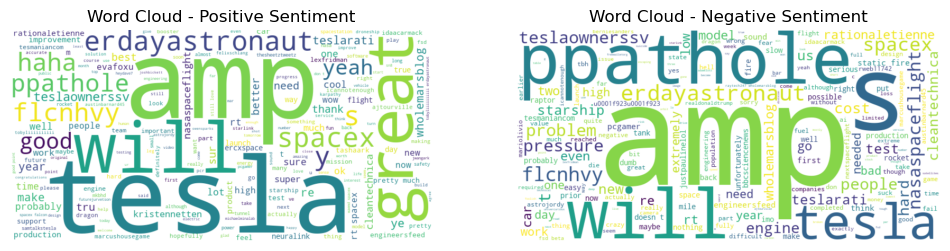

In [38]:
positive_text = " ".join(d1[d1['Sentiment_Label'] == 'positive']['Text'])
negative_text = " ".join(d1[d1['Sentiment_Label'] == 'negative']['Text'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiment')
plt.axis('off')

plt.show()

In [35]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 163.8 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 163.8 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 163.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 193.2 kB/s eta 0:00:02
   --------------- ---------------------- 122.9/300.2 kB 361.0 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 774.0 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 774.0 kB/s eta 0:00:01
   ----------